# Experimentelle Modalanalyse (EMA) | Prof. J. Grabow
## SDOF (Systeme mit einem Freiheitsgrad von f=1)
Einfache Feder-Masse-Dämpfer-Modelle bilden die Basis der Schwingungsanalyse. Modelle mit einem Freiheitsgrad werden auch SDOF-Modelle bezeichnet (single degree of freedom). Bei diesen Modellen wirken auf die konzentrierte Masse neben möglichen Erregerkräften Federkräfte und Dämpferkräfte. Die Federkräfte werden über das Hooksche Gesetz beschrieben und die Dämpferkräfte ergeben sich aus einer viskosen Reibung. 

$m \ddot{q} + k\dot{q} + cq = 0$


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 17 14:09:25 2023

Program history
17.10.2023    V. 1.0    Start
23.10.2023    V. 1.2    Frequenzgang
13.11.2023    V. 1.3    Gewichtsfunktion

@author: Prof. Jörg Grabow (grabow@amesys.de)
"""
__version__ = '1.3'
__author__ = 'Joe Grabow'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from tabulate import tabulate

### Eingabe der Strukturparameter Masse, Dämpfung und Federsteifigkeit des Systems.

In [2]:
# Masse in kg
m_1 = 2

# Dämpfung in Ns/m
k_1 = 20

# Steifigkeit in N/m
c_1 = 2500

# Anfangsbedingungen
q_0 = 10e-3         # in m
v_0 = 1             # in m/s

### Anfangsbedingungen

In [3]:
# Anfangsbedingungen
q_0 = 10e-3         # in m
v_0 = 1             # in m/s

### Berechnungen und Lösung der Dgl. im Zeitbereich

In [4]:
# Eigenkreisfrequenz ungedämpft in 1/s
w_0 = np.sqrt(c_1/m_1)

# Lehrsches Dämpfungsmaß
D = k_1 / (2 * m_1 * w_0)

# Abklingkonstante in 1/s
delta = k_1 / (2 * m_1)

# Eigenkreisfrequenz gedämpft 
w = w_0 * np.sqrt(1 - D**2)

# Eigenwerte
lambda_1 = - delta + 1j*w
lambda_conjugate = np.conj(lambda_1)

# Konstanten C1 und C2
C_1 = q_0
C_2 = (v_0 + delta * q_0) / w

# Amplitude
A = np.sqrt(C_1**2 + C_2**2)

# Phasenwinkel in Bogenmaß
phi = np.arctan2(C_1, C_2)

# Phasenwinkel in Grad
phi_degrees = np.degrees(phi)

# Eigenvektoren
psi = 0.5 * (C_1 - 1j*C_2)
psi_conjugate = np.conj(psi)

# Residuum
res = 0 - 1j / (2 * w * m_1)
res_conjugate = np.conj(res)

In [5]:
# Datenfeld zur Ausgabe
data = [
    ("Eigenkreisfrequenz " + "\u03c9\u2080" + " (ungedämpft)", "1/s", w_0, 0),
    ("Lehrsches Dämpfungsmaß D", " - ", D, 0),
    ("Abklingkonstante " + "\u03b4", "1/s", delta, 0),
    ("Eigenkreisfrequenz " + "\u03c9" + " (gedämpft)", "1/s", w, 0),
    ("Eigenwert " + "\u03bb", "1/s", np.real(lambda_1), np.imag(lambda_1)),
    ("Eigenwert " + "\u0305\u03bb", "1/s", np.real(lambda_conjugate), np.imag(lambda_conjugate)),
    ("Konstante C1", "m", C_1, 0),
    ("Konstante C2", "m", C_2, 0),
    ("Amplitude A", "m", A, 0),
    ("Phasenwinkel " +"\u03d5", "Grad", phi_degrees, 0),
    ("Eigenvektor " + "\u03c8", "m", np.real(psi), np.imag(psi)),
    ("Eigenvektor " + "\u0305\u03c8", "m", np.real(psi_conjugate), np.imag(psi_conjugate)),
    ("Residuum R", "m/Ns", 0, np.imag(res)),
    ("Residuum " + "R\u0305", "m/Ns", 0, np.imag(res_conjugate))
]

# Spaltenüberschriften
headers = ["Parameter", "Einheit", "real", "imaginär"]

# Funktion zur Formatierung der Vor- und Nachkommastellen
def custom_format(value):
    return f"{value:.4f}"

# Daten formatieren
formatted_data = [(Parameter, Einheit, custom_format(real), custom_format(imaginär)) for Parameter, Einheit, real, imaginär in data]

# Tabellenausgabe
print(tabulate(formatted_data, headers, tablefmt="fancy_grid"))

╒════════════════════════════════════╤═══════════╤═════════╤════════════╕
│ Parameter                          │ Einheit   │    real │   imaginär │
╞════════════════════════════════════╪═══════════╪═════════╪════════════╡
│ Eigenkreisfrequenz ω₀ (ungedämpft) │ 1/s       │ 35.3553 │     0      │
├────────────────────────────────────┼───────────┼─────────┼────────────┤
│ Lehrsches Dämpfungsmaß D           │ -         │  0.1414 │     0      │
├────────────────────────────────────┼───────────┼─────────┼────────────┤
│ Abklingkonstante δ                 │ 1/s       │  5      │     0      │
├────────────────────────────────────┼───────────┼─────────┼────────────┤
│ Eigenkreisfrequenz ω (gedämpft)    │ 1/s       │ 35      │     0      │
├────────────────────────────────────┼───────────┼─────────┼────────────┤
│ Eigenwert λ                        │ 1/s       │ -5      │    35      │
├────────────────────────────────────┼───────────┼─────────┼────────────┤
│ Eigenwert ̅λ                        

### Darstellung der komplexen Eigenwerte


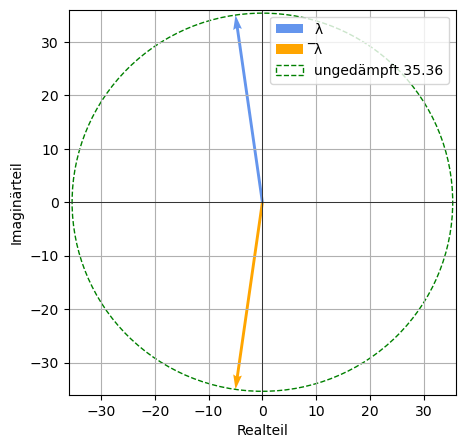

In [6]:
# Komplexe Vektoren
vector1 = lambda_1
vector2 = lambda_conjugate

# Extrahiere Real- und Imaginärteile
real1, imag1 = vector1.real, vector1.imag
real2, imag2 = vector2.real, vector2.imag

# Erstelle das Diagramm
plt.figure(figsize=(5, 5))
plt.quiver(0, 0, real1, imag1, angles='xy', scale_units='xy', scale=1, color='cornflowerblue', label='\u03bb')
plt.quiver(0, 0, real2, imag2, angles='xy', scale_units='xy', scale=1, color='orange', label='\u0305\u03bb')

# Bestimme die maximale Dimension für die Achsen
max_dimension = max(max(abs(real1), abs(real2)), max(abs(imag1), abs(imag2)))

# Setze die Achsenbegrenzungen
plt.xlim(-max_dimension - 1, max_dimension + 1)
plt.ylim(-max_dimension - 1, max_dimension + 1)

# Achsenbeschriftungen
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('Realteil')
plt.ylabel('Imaginärteil')

# Einheitskreis mit dem Radius omega_0 (ungedämpft) 
R = round(w_0,2)  
circle = Circle((0, 0), R, fill=False, color='g', linestyle='--', label=f'ungedämpft {R}')
plt.gca().add_patch(circle)

# Legende
plt.legend(loc='upper right')

# Zeige das Diagramm
plt.grid()
plt.show()

### Darstellung der Weg-Zeitfunktion (Lösung der Dgl.)
#### Variante 1

$ q_{1}(t) = A e^{- \delta t} \cdot sin(\omega t + \varphi) $

### Variante 2

$ q_{2}(t) = \psi \cdot e^{\lambda t} + \overline{\psi} \cdot e^{\overline\lambda t} $


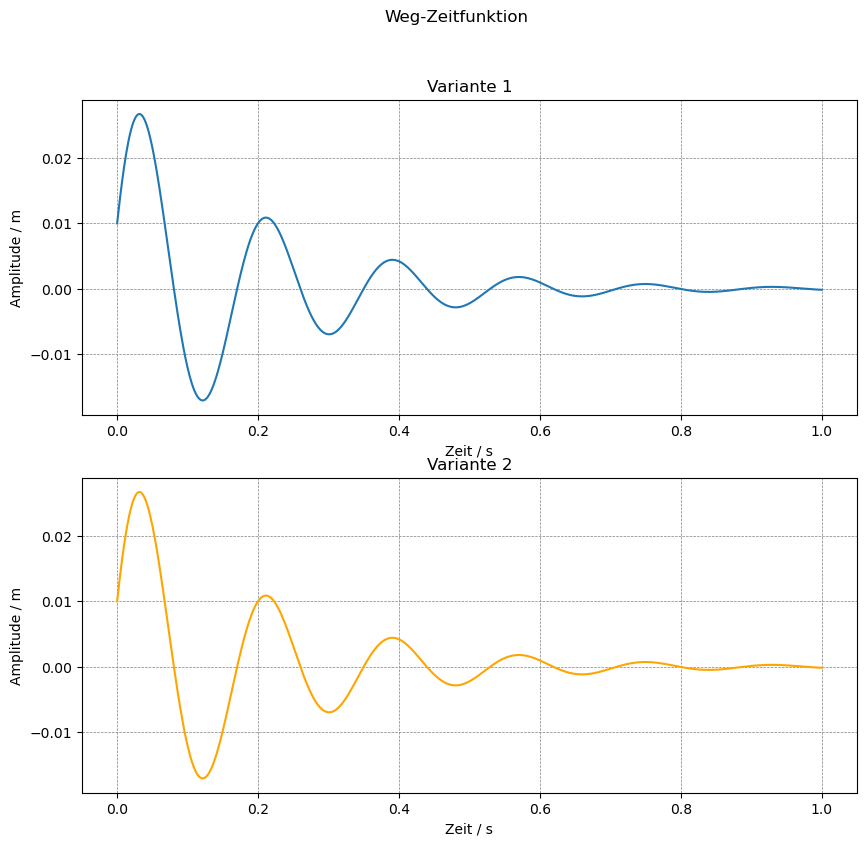

In [7]:
# Erzeuge einen Zeitvektor von 0 bis 1 Sekunde mit Schrittweite 0.001
t = np.arange(0, 1.001, 0.001)

q_1 = np.real(np.exp(- delta * t) * A * np.sin(w * t + phi))
q_2 = np.real(psi * np.exp(lambda_1 * t) + psi_conjugate * np.exp(lambda_conjugate * t))

# Darstellung der Weg-Zeitfunktion
fig, axs = plt.subplots(2, 1,figsize=(10,9))
fig.suptitle('Weg-Zeitfunktion')

# Zeige ein Gitternetz im Hintergrund an
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Erstes Gitter mit q_1
#plt.subplot(2, 1, 1)  # 2 Zeilen, 1 Spalte, erstes Diagramm
axs[0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Gitternetz einblenden
axs[0].plot(t, q_1)
axs[0].set_xlabel('Zeit / s')
axs[0].set_ylabel('Amplitude / m')
axs[0].set_title('Variante 1')

# Zweites Gitter mit q_2
#plt.subplot(2, 1, 2)  # 2 Zeilen, 1 Spalte, zweites Diagramm
axs[1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Gitternetz einblenden
axs[1].plot(t, q_2, color='orange')  # mit angepasster Farbe
axs[1].set_xlabel('Zeit / s')
axs[1].set_ylabel('Amplitude / m')
axs[1].set_title('Variante 2')

# Zeige die Plots an
plt.show()

### Berechnung des komplexen Frequenzgang H
$ H_{R}(j \Omega ) = \frac{R}{j \Omega - \lambda} + \frac{\bar{R}}{j \Omega - \bar{\lambda}} $

In [8]:
# Erregerfrequenz
omega_start = 1  # Startwert
omega_step = 0.1  # Schrittweite
omega_end = 100  # Endwert

omega_e = np.arange(omega_start, omega_end+1, omega_step)

frf = res / ((0 + 1j * omega_e) - lambda_1) + res_conjugate / ((0 + 1j * omega_e) - lambda_conjugate)
frf_r = np.real(frf)
frf_i = np.imag(frf)
frf_b = np.abs(frf)
frf_p = np.angle(frf, deg = True)

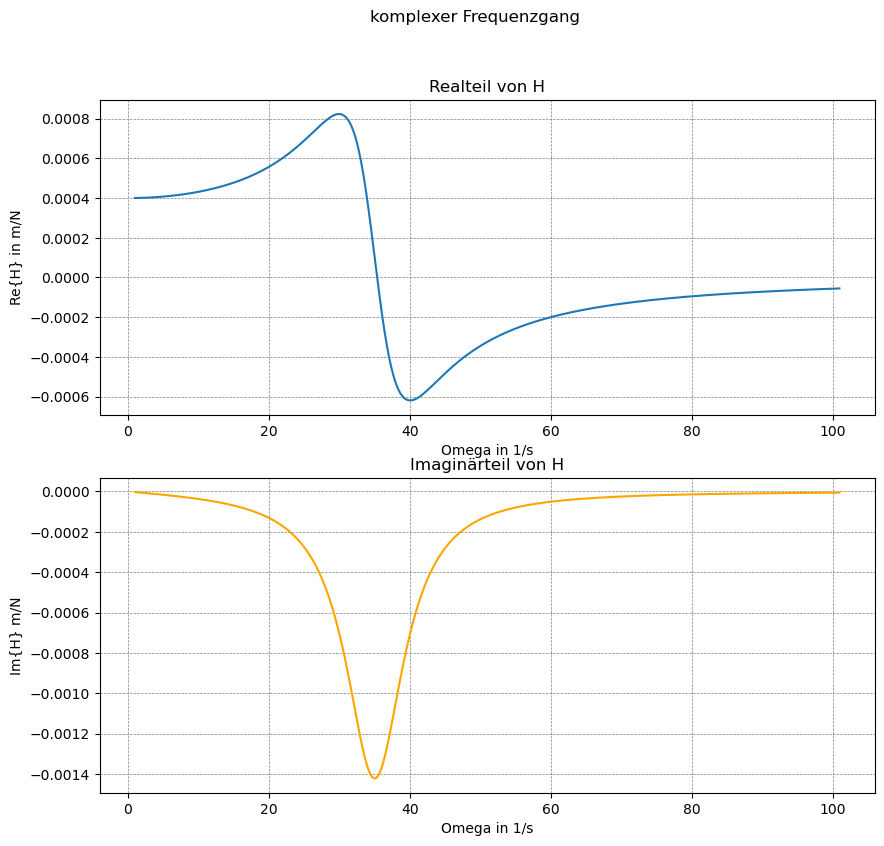

In [9]:
# Darstellung des Frequenzgang als Real- und Imaginärteil
fig, axs = plt.subplots(2, 1,figsize=(10,9))
fig.suptitle('komplexer Frequenzgang')

# Zeige ein Gitternetz im Hintergrund an
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Erstes Gitter mit Realteil
axs[0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Gitternetz einblenden
axs[0].plot(omega_e, frf_r)
axs[0].set_xlabel('Omega in 1/s')
axs[0].set_ylabel('Re{H} in m/N')
axs[0].set_title('Realteil von H')

# Zweites Gitter mit Imaginärteil
axs[1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Gitternetz einblenden
axs[1].plot(omega_e, frf_i, color='orange')  # mit angepasster Farbe
axs[1].set_xlabel('Omega in 1/s')
axs[1].set_ylabel('Im{H} m/N')
axs[1].set_title('Imaginärteil von H')

# Zeige die Plots an
plt.show()

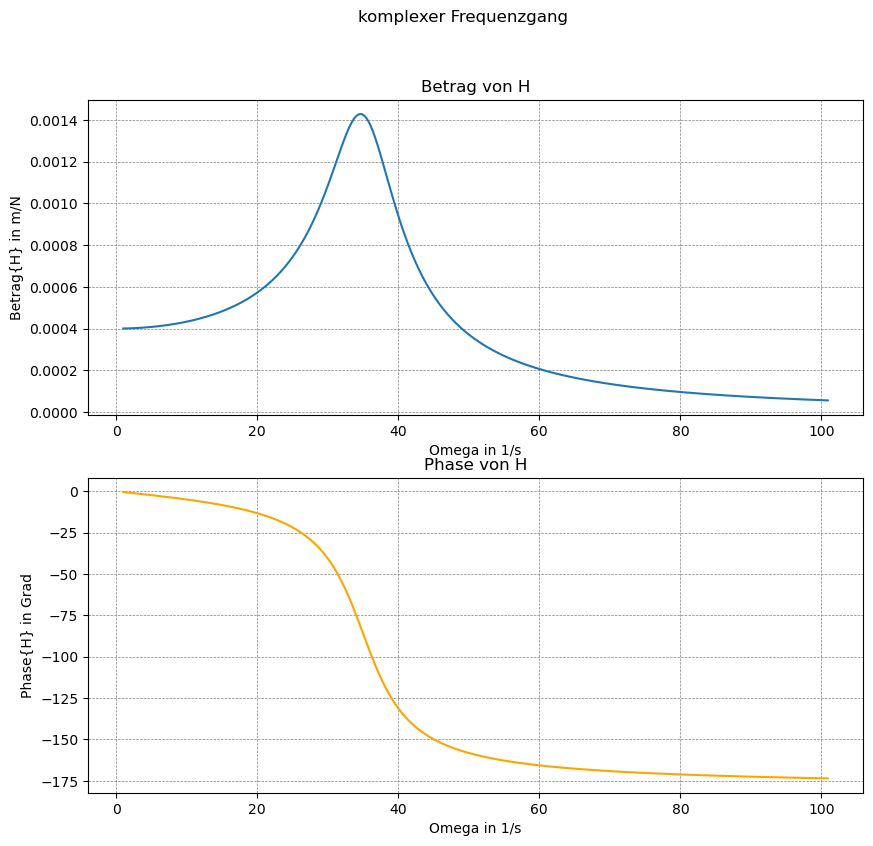

In [10]:
# Darstellung des Frequnzgang in Betrag und Phase
fig, axs = plt.subplots(2, 1,figsize=(10,9))
fig.suptitle('komplexer Frequenzgang')

# Zeige ein Gitternetz im Hintergrund an
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Erstes Gitter mit Realteil
axs[0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Gitternetz einblenden
axs[0].plot(omega_e, frf_b)
axs[0].set_xlabel('Omega in 1/s')
axs[0].set_ylabel('Betrag{H} in m/N')
axs[0].set_title('Betrag von H')

# Zweites Gitter mit Imaginärteil
axs[1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Gitternetz einblenden
axs[1].plot(omega_e, frf_p, color='orange')  # mit angepasster Farbe
axs[1].set_xlabel('Omega in 1/s')
axs[1].set_ylabel('Phase{H} in Grad')
axs[1].set_title('Phase von H')

# Zeige die Plots an
plt.show()

### Berechnung der Gewichtsfunktion h(t)
$ h\left ( t \right )=2\cdot \left | R \right |\cdot e^{- \delta t}\cdot sin\left ( \omega t \right ) $

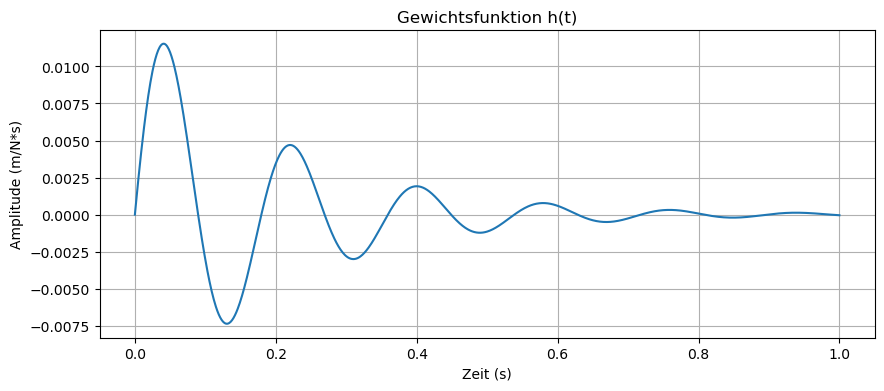

In [11]:
# Berechnung der Gewichtsfunktion
h = 2 * np.abs(res) * np.exp(- delta * t) * np.sin(w * t)

# Darstellung der Gewichtsfunktion
plt.figure(figsize=(10, 4))
plt.plot(t, h, marker=' ', linestyle='-')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude (m/N*s)')
plt.title('Gewichtsfunktion h(t)')
plt.grid(True)
plt.show()

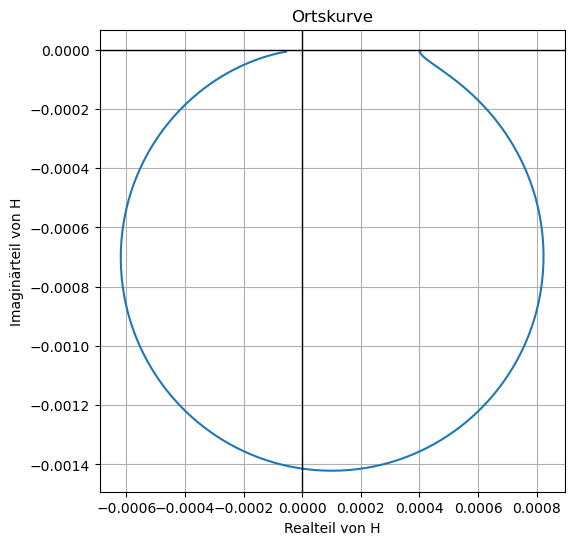

In [12]:
# Zeichne die Ortskurve
plt.figure(figsize=(6, 6))
plt.plot(frf_r, frf_i)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Realteil von H')
plt.ylabel('Imaginärteil von H')
plt.title('Ortskurve')
plt.grid(True)
plt.show()